In [1]:
import numpy as np
import math
from statsmodels.distributions.empirical_distribution import ECDF
import texttable as ttable
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import chi2
from scipy import stats


In [2]:
def get_bounds(mean, deviation):
    coef_mtrx = np.array([[1, 1], [1, -1]])
    free_el_vector = np.array([2 * mean, math.pow((12 * deviation), 1 / 2)])
    result = np.linalg.solve(coef_mtrx, free_el_vector)
    return result[1], result[0]


def g(y):
    return math.atan(y)


def cdf_y(y):
    return math.tan(y) / 18 + 0.32

def pdf_y(y):
    return 1 / (18 * math.pow(math.cos(y), 2))

def get_x_var_series(a, b, n=100):
    random_dist_nums = np.linspace(0, 1, n)
    x_variations = [i * (b - a) + a for i in random_dist_nums]
    x_variations.sort()
    return x_variations


def get_y_var_series(x_series):
    result = [g(x) for x in x_series]
    result.sort
    return result


def print_cdf_table(cdf):
    table = ttable.Texttable()
    table.header(['x', 'F(x)'])
    for i in range(len(cdf.x)):
        table.add_row([cdf.x[i], cdf.y[i]])
        
    print(table.draw())


def show_cdf_plot(x_1, p_1):
    plt.plot(x, p)
    plt.ylabel('P(x)')
    plt.xlabel('x')
    plt.show()



In [3]:
a, b = get_bounds(2, 27)
x_series = get_x_var_series(a, b)
y_series = get_y_var_series(x_series)


In [4]:
def count_in_bounds(arr, a, b):
    return len([i for i in arr if (a <= i and i <= b)])


def get_equal_interv_series(bounds, n, arr):
    intervals = np.linspace(*bounds, n)
    frequencies = [count_in_bounds(arr, intervals[i-1], intervals[i]) for i in range(1, len(intervals))]
    return intervals, [0, *frequencies] 

def prepare_for_ecdf(values, frequencies): 
    result = []
    for i in range(len(values)):
        result += [values[i]] * frequencies[i]
        
    return result

In [5]:
n = 100

def get_ecdf_p(v, ecdf):
    for i in range(len(ecdf.x)):
        if ecdf.x[i] > v:
            return ecdf.y[i]
        
    return 1

def get_amount_in_bounds(a, b, arr):
    return len([i for i in arr if (a <= i and i <= b)])

def get_eq_int_intervals(bounds, n):
    linspace = np.linspace(*bounds, n)
    return [(linspace[i-1], linspace[i]) for i in range(1, len(linspace))]

def get_eq_int_hist_data(series, bounds, n):
    intervals = get_eq_int_intervals(bounds, n)
    amount = len(series)
    step = intervals[0][1] - intervals[0][0]
    height = [get_amount_in_bounds(*i, series) / (amount * step) for i in intervals]
    return intervals, height

def plot_eq_int_hist(series, bounds, n):
    intervals, heights = get_eq_int_hist_data(series, bounds, n)
    intervals_bounds = [i[1] for i in intervals]
    plt.plot(intervals_bounds, heights, drawstyle="steps")
    plt.fill_between(intervals_bounds, heights,  step="pre", alpha=0.4)

def plot_eq_int_polygon(series, bounds, n):
    intervals, heights = get_eq_int_hist_data(series, bounds, n)
    polygon_x = [(a + b) / 2 for a, b in intervals]
    plt.plot(polygon_x, heights)

def plot_pdf():
    l = np.linspace(-1.45, 1.45, 100)
    plt.plot(l, [pdf_y(i) for i in l])



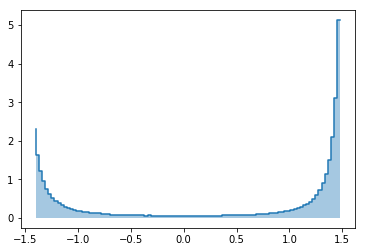

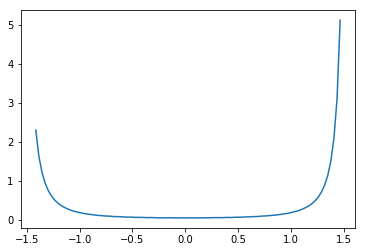

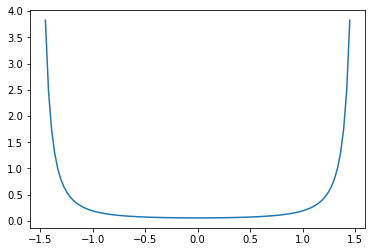

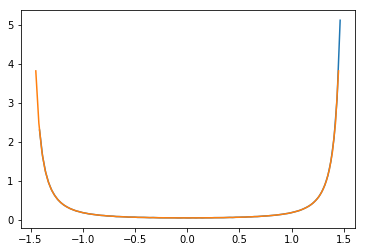

In [6]:
a, b = get_bounds(2, 27)
bounds = g(a), g(b)
x_series = get_x_var_series(a, b, 10000)
y_series = get_y_var_series(x_series)

plot_eq_int_hist(y_series, bounds, n)
plt.show()

plot_eq_int_polygon(y_series, bounds, n)
plt.show()

plot_pdf()
plt.show()

plot_eq_int_polygon(y_series, bounds, n)
plot_pdf()
plt.show()

In [7]:
def get_eq_pr_intervals(series, amount_of_steps):
    step_size = len(series) // amount_of_steps
    intervals = []
    for i in range(1, amount_of_steps):
        intervals.append((series[(i-1)*step_size-1], series[i*step_size-1]))
        
    return intervals

def get_eq_pr_hist_data(series, bounds, n):
    intervals = get_eq_pr_intervals(series, n)
    amount = len(series)
    height = []
    for i in intervals:
        step = i[1]-i[0]
        height.append(get_amount_in_bounds(*i, series) / (amount * step))
     
    return intervals, height

def plot_eq_pr_hist(series, bounds, n):
    intervals, heights = get_eq_pr_hist_data(series, bounds, n)
    intervals_bounds = [i[1] for i in intervals]
    plt.plot(intervals_bounds, heights, drawstyle="steps")
    plt.fill_between(intervals_bounds, heights,  step="pre", alpha=0.4)

def plot_eq_pr_polygon(series, bounds, n):
    intervals, heights = get_eq_pr_hist_data(series, bounds, n)
    polygon_x = [x[1] for x in intervals]
    plt.plot(polygon_x, heights)


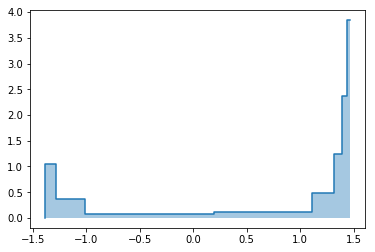

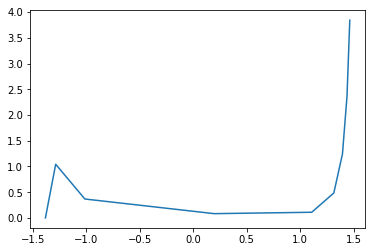

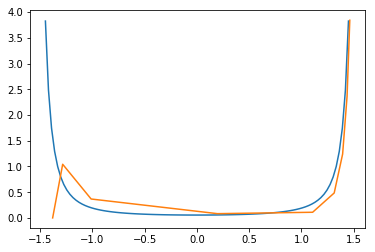

In [8]:
a, b = get_bounds(2, 27)
x_series = get_x_var_series(a, b, 10000)
y_series = get_y_var_series(x_series)
y_series.sort()
n = 10

plot_eq_pr_hist(y_series, bounds, n)
plt.show()

plot_eq_pr_polygon(y_series, bounds, n)
plt.show()

plot_pdf()
plot_eq_pr_polygon(y_series, bounds, n)
plt.show()

In [9]:
a, b = get_bounds(2, 27)
bounds = a, b
step_size = 10
n = 200

x_series = get_x_var_series(*bounds, n)
y_series = get_y_var_series(x_series)
y_series.sort()

def count_getting_in_interval_p(interval, cdf=cdf_y):
    return cdf(interval[1]) - cdf(interval[0])

def get_p_sequences(intervals, series, n):
    tp_of_getting_in_intervals = [count_getting_in_interval_p(i) for i in intervals]
    ep_of_getting_in_intervals = [get_amount_in_bounds(*i, series) / n for i in intervals]
    p = tp_of_getting_in_intervals[1] 
    tp_of_getting_in_intervals[0], ep_of_getting_in_intervals[0] = p, p
    return tp_of_getting_in_intervals, ep_of_getting_in_intervals

def count_x_2(tp_of_getting_in_intervals, ep_of_getting_in_intervals, n):
    result = 0
    for i in range(len(tp_of_getting_in_intervals)):
        p_i, empiric_p_i = tp_of_getting_in_intervals[i], ep_of_getting_in_intervals[i]
        result += math.pow(p_i - empiric_p_i, 2) / p_i
    return result * n

def invoke_pirson_criteria_check(series, bounds, step_size, n, a):
    intervals, heights = get_eq_pr_hist_data(y_series, bounds, step_size)
    tp_of_getting_in_intervals, ep_of_getting_in_intervals = get_p_sequences(intervals, y_series, n)
    x_2 = count_x_2(tp_of_getting_in_intervals, ep_of_getting_in_intervals, n)
    m = n // step_size
    chi_isf = chi2.isf(a, m-1)

    print('Theoretical: ')
    print([t for t in tp_of_getting_in_intervals])
    print('Empiric')
    print(["{0:0.2f}".format(e) for e in ep_of_getting_in_intervals])
    print('chi2: ', x_2)
    print('Is H valid: ', x_2 < chi_isf)
    
    

invoke_pirson_criteria_check(y_series, bounds, step_size, n, 0.01)    

Theoretical: 
[0.10050251256281412, 0.10050251256281412, 0.10050251256281406, 0.10050251256281406, 0.10050251256281406, 0.10050251256281412, 0.10050251256281395, 0.1005025125628145, 0.10050251256281406]
Empiric
['0.10', '0.10', '0.10', '0.10', '0.10', '0.10', '0.10', '0.10', '0.10']
chi2:  0.3220201005025052
Is H valid:  True


In [12]:
a, b = get_bounds(3, 26)
bounds = a, b
n = 30

x_series = get_x_var_series(*bounds, n)
y_series = get_y_var_series(x_series)
y_series.sort()
ecdf_x = ECDF(y_series).x[1:]
ecdf_y = ECDF(y_series).y[1:]
tcdf_y = [cdf_y(i) for i in ecdf_x] 

def cdf_arr(arr):
    return []

[-0.003986714795991664, 0.029851449442812372, 0.06368961368161657, 0.09752777792042047, 0.13136594215922456, 0.16520410639802857, 0.19904227063683258, 0.23288043487563653, 0.26671859911444057, 0.3005567633532446, 0.33439492759204864, 0.3682330918308526, 0.40207125606965666, 0.43590942030846064, 0.4697475845472646, 0.5035857487860688, 0.5374239130248727, 0.5712620772636767, 0.6051002415024809, 0.6389384057412846, 0.6727765699800887, 0.7066147342188931, 0.7404528984576966, 0.7742910626965012, 0.8081292269353044, 0.841967391174109, 0.8758055554129134, 0.9096437196517171, 0.943481883890521, 0.9773200481293252]
